In [0]:
'''
======================
3D surface (color map)
======================

Demonstrates plotting a 3D surface colored with the coolwarm color map.
The surface is made opaque by using antialiased=False.

Also demonstrates using the LinearLocator and custom formatting for the
z axis tick labels.
'''
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


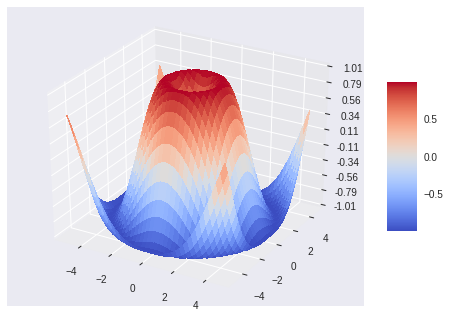

In [3]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


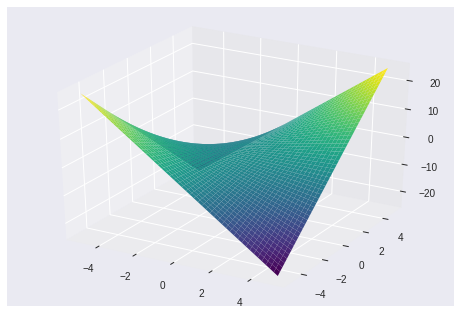

In [202]:
from sympy import symbols
from sympy.plotting import plot3d

x, y = symbols('x y')

expr = x*y
x_range = (x, -5, 5)
y_range = (y, -5, 5)

plot3d(expr, x_range, y_range);

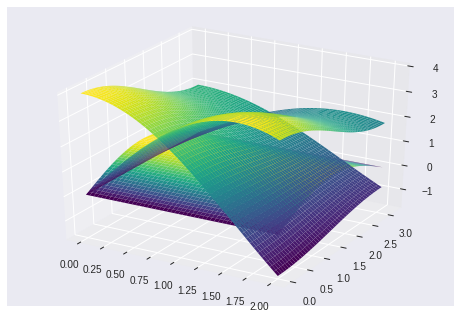

In [204]:
x, y = symbols('x y')
f1 = 3*cos(x) + cos(x)*cos(y)
f2 = 3*sin(x) + sin(x)*cos(y)
f3 = sin(y)
"""
plot3d(
    (x**2 + y**2, (x, -5, 5), (y, -5, 5)),
    (x*y, (x, -3, 3), (y, -3, 3))
);
"""
plot3d(
    (f1, (x, 0, 2) , (y, 0, pi)),
    (f2, (x, 0, 2) , (y, 0, pi)),
    (f3, (x, 0, 2) , (y, 0, pi))
)

In [0]:
# XY plain to map z graph functions
import sys
from matplotlib import cm
from sympy import log, pi, sqrt, sin, Symbol
from sympy.core.sympify import sympify, SympifyError
from sympy.core.compatibility import is_sequence
from sympy.external import import_module
np = import_module('numpy')

def sample2d(f, x_args):
    try:
        f = sympify(f)
    except SympifyError:
        raise ValueError("f could not be interpretted as a SymPy function")
    try:
        x, x_min, x_max, x_n = x_args
    except (TypeError, IndexError):
        raise ValueError("x_args must be a tuple of the form (var, min, max, n)")
    x_l = float(x_max - x_min)
    x_d = x_l/float(x_n)
    X = np.arange(float(x_min), float(x_max) + x_d, x_d)
    Y = np.empty(len(X))
    for i in range(len(X)):
        try:
            Y[i] = float(f.subs(x, X[i]))
        except TypeError:
            Y[i] = None
    return X, Y

def sample3d(f, x_args, y_args):
    x, x_min, x_max, x_n = None, None, None, None
    y, y_min, y_max, y_n = None, None, None, None
    try:
        f = sympify(f)
    except SympifyError:
        raise ValueError("f could not be interpreted as a SymPy function")
    try:
        x, x_min, x_max, x_n = x_args
        y, y_min, y_max, y_n = y_args
    except (TypeError, IndexError):
        raise ValueError("x_args and y_args must be tuples of the form (var, min, max, intervals)")
    x_l = float(x_max - x_min)
    x_d = x_l/float(x_n)
    x_a = np.arange(float(x_min), float(x_max) + x_d, x_d)
    y_l = float(y_max - y_min)
    y_d = y_l/float(y_n)
    y_a = np.arange(float(y_min), float(y_max) + y_d, y_d)
    def meshgrid(x, y):
        x = np.array(x)
        y = np.array(y)
        numRows, numCols = len(y), len(x)
        x.shape = 1, numCols
        X = np.repeat(x, numRows, 0)

        y.shape = numRows, 1
        Y = np.repeat(y, numCols, 1)
        return X, Y
    X, Y = np.meshgrid(x_a, y_a)
    Z = np.ndarray((len(X), len(X[0])))
    for j in range(len(X)):
        for k in range(len(X[0])):
            try:
                Z[j][k] = float(f.subs(x, X[j][k]).subs(y, Y[j][k]))
            except (TypeError, NotImplementedError):
                Z[j][k] = 0
    return X, Y, Z

def sample(f, *var_args):
    if len(var_args) == 1:
        return sample2d(f, var_args[0])
    elif len(var_args) == 2:
        return sample3d(f, var_args[0], var_args[1])
    else:
        raise ValueError("Only 2d and 3d sampling are supported at this time.")

def mplot3d(f, var1, var2, show=True):
    import warnings
    warnings.filterwarnings("ignore", "Could not match \S")
    p = import_module('pylab')
    # Try newer version first
    p3 = import_module('mpl_toolkits.mplot3d',
        __import__kwargs={'fromlist': ['something']}) or import_module('matplotlib.axes3d')
    if not p or not p3:
        sys.exit("Matplotlib is required to use mplot3d.")
    x, y, z = sample(f, var1, var2)
    fig = p.figure()
    ax = p3.Axes3D(fig)
    ax.plot_surface(x, y, z, rstride=2, cstride=2, cmap=cm.coolwarm)
    #ax.plot_wireframe(x, y, z)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    if show:
        p.show()
        
def mplot2d(f, var, show=True):
    import warnings
    warnings.filterwarnings("ignore", "Could not match \S")
    p = import_module('pylab')
    if not p:
        sys.exit("Matplotlib is required to use mplot2d.")
    if not is_sequence(f):
        f = [f, ]
    for f_i in f:
        x, y = sample(f_i, var)
        p.plot(x, y)
    p.draw()
    if show:
        p.show()

In [0]:

"""
Utility functions for plotting sympy functions.
See examples\mplot2d.py and examples\mplot3d.py for usable 2d and 3d
graphing functions using matplotlib.
"""
from matplotlib import cm
from sympy.core.sympify import sympify, SympifyError
from sympy.external import import_module
np = import_module('numpy')

def sample2d(f, x_args):
    """
    Samples a 2d function f over specified intervals and returns two
    arrays (X, Y) suitable for plotting with matlab (matplotlib)
    syntax. See examples\mplot2d.py.
    f is a function of one variable, such as x**2.
    x_args is an interval given in the form (var, min, max, n)
    """
    try:
        f = sympify(f)
    except SympifyError:
        raise ValueError("f could not be interpretted as a SymPy function")
    try:
        x, x_min, x_max, x_n = x_args
    except (TypeError, IndexError):
        raise ValueError("x_args must be a tuple of the form (var, min, max, n)")

    x_l = float(x_max - x_min)
    x_d = x_l/float(x_n)
    X = np.arange(float(x_min), float(x_max) + x_d, x_d)

    Y = np.empty(len(X))
    for i in range(len(X)):
        try:
            Y[i] = float(f.subs(x, X[i]))
        except TypeError:
            Y[i] = None
    return X, Y


def sample3d(f, x_args, y_args):
    """
    Samples a 3d function f over specified intervals and returns three
    2d arrays (X, Y, Z) suitable for plotting with matlab (matplotlib)
    syntax. See examples\mplot3d.py.
    f is a function of two variables, such as x**2 + y**2.
    x_args and y_args are intervals given in the form (var, min, max, n)
    """
    x, x_min, x_max, x_n = None, None, None, None
    y, y_min, y_max, y_n = None, None, None, None
    try:
        f = sympify(f)
    except SympifyError:
        raise ValueError("f could not be interpreted as a SymPy function")
    try:
        x, x_min, x_max, x_n = x_args
        y, y_min, y_max, y_n = y_args
    except (TypeError, IndexError):
        raise ValueError("x_args and y_args must be tuples of the form (var, min, max, intervals)")

    x_l = float(x_max - x_min)
    x_d = x_l/float(x_n)
    x_a = np.arange(float(x_min), float(x_max) + x_d, x_d)

    y_l = float(y_max - y_min)
    y_d = y_l/float(y_n)
    y_a = np.arange(float(y_min), float(y_max) + y_d, y_d)

    def meshgrid(x, y):
        """
        Taken from matplotlib.mlab.meshgrid.
        """
        x = np.array(x)
        y = np.array(y)
        numRows, numCols = len(y), len(x)
        x.shape = 1, numCols
        X = np.repeat(x, numRows, 0)

        y.shape = numRows, 1
        Y = np.repeat(y, numCols, 1)
        return X, Y

    X, Y = np.meshgrid(x_a, y_a)

    Z = np.ndarray((len(X), len(X[0])))
    for j in range(len(X)):
        for k in range(len(X[0])):
            try:
                Z[j][k] = float(f.subs(x, X[j][k]).subs(y, Y[j][k]))
            except (TypeError, NotImplementedError):
                Z[j][k] = 0
    return X, Y, Z


def sample(f, *var_args):
    """
    Samples a 2d or 3d function over specified intervals and returns
    a dataset suitable for plotting with matlab (matplotlib) syntax.
    Wrapper for sample2d and sample3d.
    f is a function of one or two variables, such as x**2.
    var_args are intervals for each variable given in the form (var, min, max, n)
    """
    if len(var_args) == 1:
        return sample2d(f, var_args[0])
    elif len(var_args) == 2:
        return sample3d(f, var_args[0], var_args[1])
    else:
        raise ValueError("Only 2d and 3d sampling are supported at this time.")



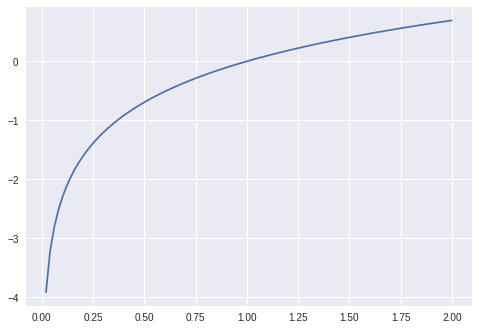

In [5]:
#!/usr/bin/env python

"""Matplotlib 2D plotting example

Demonstrates plotting with matplotlib.
"""

import sys

from sympy import log, pi, sqrt, sin, Symbol
from sympy.core.compatibility import is_sequence
from sympy.external import import_module


def mplot2d(f, var, show=True):
    """
    Plot a 2d function using matplotlib/Tk.
    """

    import warnings
    warnings.filterwarnings("ignore", "Could not match \S")

    p = import_module('pylab')
    if not p:
        sys.exit("Matplotlib is required to use mplot2d.")

    if not is_sequence(f):
        f = [f, ]

    for f_i in f:
        x, y = sample(f_i, var)
        p.plot(x, y)

    p.draw()
    if show:
        p.show()


def main():
    x = Symbol('x')

    mplot2d(log(x), (x, 0, 2, 100))
    # mplot2d([sin(x), -sin(x)], (x, float(-2*pi), float(2*pi), 50))
    #mplot2d([sqrt(x), -sqrt(x), sqrt(-x), -sqrt(-x)], (x, -40.0, 40.0, 80))

if __name__ == "__main__":
    main()


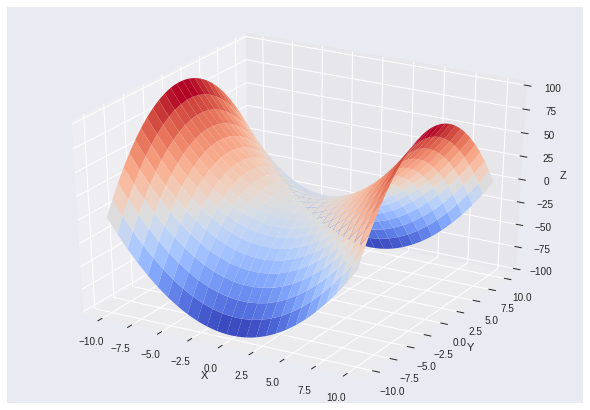

In [6]:
#!/usr/bin/env python

"""Matplotlib 3D plotting example
Demonstrates plotting with matplotlib.
"""

import sys

from sympy import sin, Symbol
from sympy.external import import_module


def mplot3d(f, var1, var2, show=True):
    """
    Plot a 3d function using matplotlib/Tk.
    """

    import warnings
    warnings.filterwarnings("ignore", "Could not match \S")

    p = import_module('pylab')
    # Try newer version first
    p3 = import_module('mpl_toolkits.mplot3d',
        __import__kwargs={'fromlist': ['something']}) or import_module('matplotlib.axes3d')
    if not p or not p3:
        sys.exit("Matplotlib is required to use mplot3d.")

    x, y, z = sample(f, var1, var2)

    fig = p.figure()
    ax = p3.Axes3D(fig)

    ax.plot_surface(x, y, z, rstride=2, cstride=2, cmap=cm.coolwarm)
    #ax.plot_wireframe(x, y, z)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    if show:
        p.show()


def main():
    x = Symbol('x')
    y = Symbol('y')

    mplot3d(x**2 - y**2, (x, -10.0, 10.0, 50), (y, -10.0, 10.0, 50))
    #mplot3d(x**2+y**2, (x, -10.0, 10.0, 20), (y, -10.0, 10.0, 20))
    #mplot3d(sin(x)+sin(y), (x, -3.14, 3.14, 50), (y, -3.14, 3.14, 50))

if __name__ == "__main__":
    main()